<a href="https://colab.research.google.com/github/melissacornfield/April_Capstone/blob/master/Copy_of_Midterm_Melissa_Cornfield_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melissa Cornfield

BAN-8101 Predictive Analytics

Question 1


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
from scipy.stats import shapiro
import scipy.stats as stats
import pylab
import matplotlib.pyplot as py
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from IPython.core.interactiveshell import SingletonConfigurable

In [3]:
properties = pd.read_csv("/content/drive/MyDrive/homework.csv", low_memory=False)


In [4]:
row_count = len(properties)
print(row_count)

201092


In [5]:
properties['CCAO mailed AV'] = properties['CCAO mailed AV'].replace([np.inf, -np.inf], np.nan)
properties = properties[properties['CCAO mailed AV'].notna()]
properties = properties.dropna(subset=['CCAO mailed AV'])

In [6]:
properties['CCAO certified AV'] = properties['CCAO certified AV'].replace([np.inf, -np.inf], np.nan)
properties = properties[properties['CCAO certified AV'].notna()]
properties = properties.dropna(subset=['CCAO certified AV'])

In [7]:
properties['BOR certified AV (final)'] = properties['BOR certified AV (final)'].replace([np.inf, -np.inf], np.nan)
properties = properties[properties['BOR certified AV (final)'].notna()]
properties = properties.dropna(subset=['BOR certified AV (final)'])

In [8]:
row_count = len(properties)
print(row_count)

201092


In [9]:
properties.describe()

,area,area_num_1,assessorbl,assessornb,censustrac,chicagowar,comarea,comarea_id,commission,congressio,...,Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
count,201092.0,201092.000000,102762.000000,102762.000000,2.010920e+05,201092.000000,201092.0,201092.0,201092.000000,201092.000000,...,201092.000000,201092.000000,201092.000000,201092.000000,201092.000000,201092.000000,201092.000000,201092.000000,201092.000000,201092.000000
mean,0.0,44.739468,203.064528,174.752243,1.703148e+10,23.507683,0.0,0.0,7.140553,3.439918,...,0.246795,0.360799,0.343630,0.032956,0.015943,0.237807,0.366840,0.251808,0.143618,39367.376415
std,0.0,23.094609,7.015257,145.527434,2.475111e+05,12.022996,0.0,0.0,3.669548,2.042598,...,0.255660,0.393164,0.288488,0.061273,0.010487,0.036053,0.053185,0.031524,0.038099,20041.589340
min,0.0,1.000000,100.000000,10.000000,1.703101e+10,1.000000,0.0,0.0,1.000000,1.000000,...,0.005000,0.004000,0.001000,0.000000,0.000000,0.075000,0.278000,0.139000,0.048000,2006.000000
25%,0.0,19.000000,203.000000,60.000000,1.703119e+10,13.000000,0.0,0.0,4.000000,2.000000,...,0.028000,0.024000,0.057000,0.003000,0.008000,0.212000,0.335000,0.233000,0.111000,26346.000000
50%,0.0,52.000000,203.000000,120.000000,1.703154e+10,21.000000,0.0,0.0,7.000000,3.000000,...,0.127000,0.053000,0.296000,0.008000,0.013000,0.238000,0.355000,0.255000,0.140000,37478.000000
75%,0.0,66.000000,203.000000,280.000000,1.703169e+10,34.000000,0.0,0.0,11.000000,5.000000,...,0.418000,0.827000,0.541000,0.043000,0.025000,0.267000,0.391000,0.275000,0.179000,45909.000000
max,0.0,77.000000,597.000000,600.000000,1.703184e+10,50.000000,0.0,0.0,16.000000,9.000000,...,0.833000,0.966000,0.913000,0.730000,0.052000,0.413000,0.648000,0.320000,0.269000,101365.000000


In [10]:
properties.skew()

<ipython-input-10-455c2a0a8ac9>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  properties.skew()


area                                         0.000000
area_num_1                                  -0.334710
assessorbl                                  46.136891
assessornb                                   0.723658
censustrac                                  -0.347905
                                              ...    
Comm - Share of Population Aged under 18    -0.149098
Comm - Share of Population Aged 18 to 44     1.895940
Comm - Share of Population Aged 45 to 64    -0.474845
Comm - Share of Population Aged over 65      0.259924
Comm - Total Population                      0.929380
Length: 107, dtype: float64

In [11]:
properties.kurtosis()

<ipython-input-11-3f4ecbb53dfc>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  properties.kurtosis()


area                                           0.000000
area_num_1                                    -1.433998
assessorbl                                  2234.152095
assessornb                                    -0.869860
censustrac                                    -1.309343
                                               ...     
Comm - Share of Population Aged under 18       0.690939
Comm - Share of Population Aged 18 to 44       6.454064
Comm - Share of Population Aged 45 to 64      -0.063333
Comm - Share of Population Aged over 65       -0.607653
Comm - Total Population                        0.509782
Length: 107, dtype: float64

<Axes: ylabel='Frequency'>

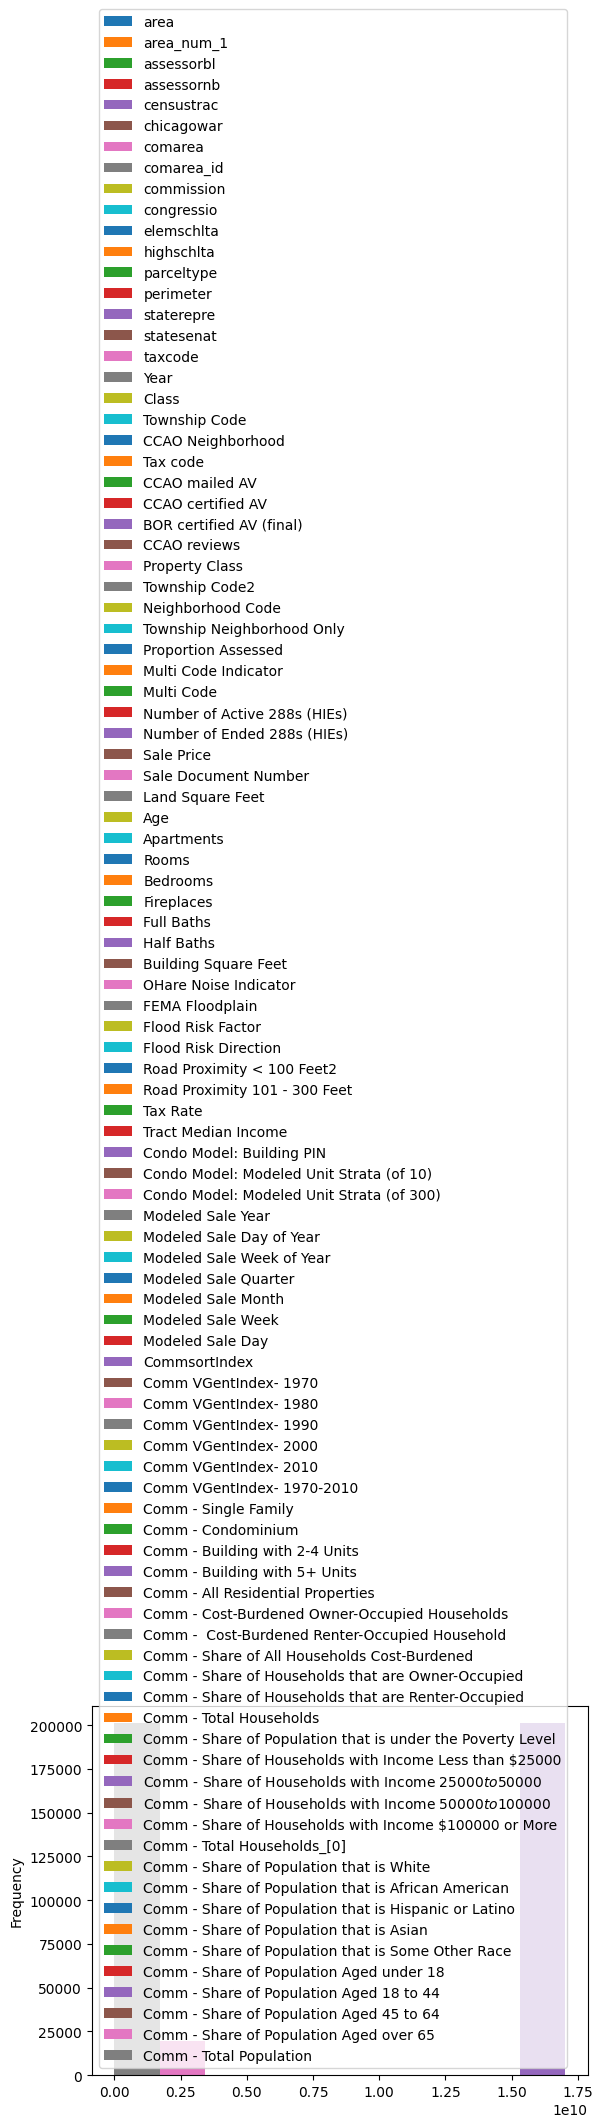

In [12]:
properties.plot(kind="hist")

<Axes: xlabel='CCAO mailed AV', ylabel='CCAO certified AV'>

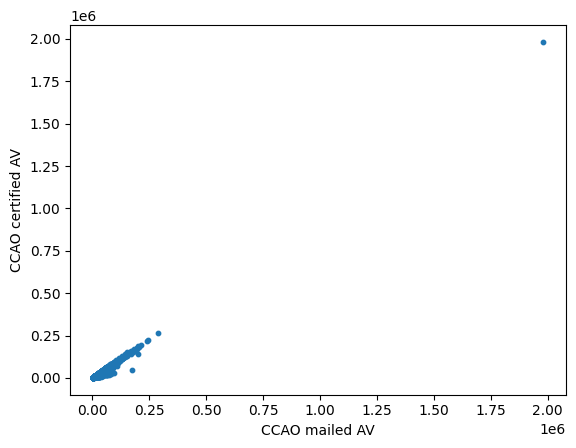

In [13]:
properties.plot(kind="scatter", x="CCAO mailed AV", y="CCAO certified AV", s=10)

In [14]:
res = properties['CCAO mailed AV'].corr(properties['CCAO certified AV'])
print(res)


0.9972704571166273


In [15]:
res = properties['CCAO mailed AV'].corr(properties['CCAO certified AV'])
print(res)

0.9972704571166273


In [16]:
x = properties[['CCAO mailed AV']]
y = properties['CCAO certified AV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3898)

In [17]:
res = properties.var()
print(res)

area                                        0.000000e+00
area_num_1                                  5.333609e+02
assessorbl                                  4.921384e+01
assessornb                                  2.117823e+04
censustrac                                  6.126174e+10
                                                ...     
Comm - Share of Population Aged under 18    1.299811e-03
Comm - Share of Population Aged 18 to 44    2.828670e-03
Comm - Share of Population Aged 45 to 64    9.937921e-04
Comm - Share of Population Aged over 65     1.451568e-03
Comm - Total Population                     4.016653e+08
Length: 107, dtype: float64


<ipython-input-17-0c98bb259757>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  res = properties.var()


In [18]:
lmModel = LinearRegression()

In [19]:
lmModel.fit(x_train, y_train)

LinearRegression()

In [20]:
res = lmModel.score(properties[["CCAO mailed AV"]], properties["CCAO certified AV"])
print(res)


0.994541859710436


In [21]:
y_pred = lmModel.predict(x_test)

In [22]:


y_pred = lmModel.predict(x_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)




646.504145279336


In [23]:
r2 = r2_score(y_test, y_pred)
print(r2)

NameError: ignored